## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://github.com/astec-stfc/masterlattice/) and [SimCodes](https://github.com/astec-stfc/simcodes/) repositories have been installed. Alternatively, these repos can be cloned and provided as keyword arguments `master_lattice=<loc>` and `simcodes=<loc>` on instantiation of the `Framework` class.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/xkc85723/Documents/simframe')
import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

initializing ocelot...


Invalid MIT-MAGIC-COOKIE-1 key

### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [4]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [5]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [6]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [7]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [8]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [9]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [10]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090) 

Generate and track the bunch 

In [11]:
framework.track(startfile=startline, endfile=endline)

The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [12]:
fwdir = load_directory("./getting_started", beams=True, verbose=True)

Found MasterLattice Package = /home/xkc85723/.local/lib/python3.12/site-packages/MasterLattice/
Found SimCodes Package = /home/xkc85723/.local/lib/python3.12/site-packages/SimCodes/
Directory: /home/xkc85723/Documents/simframe/docs/source/examples/notebooks/getting_started
elegant ['S05.twi', 'S04.twi', 'L4H.twi', 'L02.twi', 'VBC.twi', 'L03.twi', 'S06.twi', 'S03.twi', 'S02.twi']
GPT []
ASTRA ['injector400.Xemit.001']
ocelot []


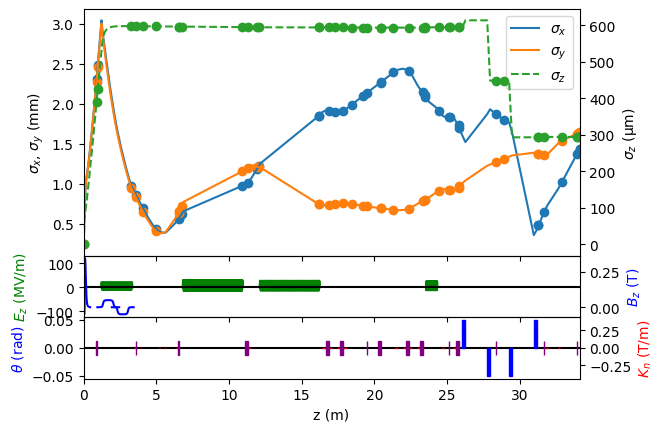

In [13]:
plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])

In [2]:
tws = rtf.twiss()

In [3]:
tws.load_directory('./getting_started')

{'gamma_y': twissParameter(name='gamma_y', unit='', val=array([3.94132263e+06, 1.29493100e+02, 1.30542388e+02, 2.36659845e+02,
       9.99434466e+01, 1.09153304e+01, 1.10636065e+01, 6.85514034e+01,
       1.28956707e+02, 1.17356885e+02, 9.04814776e+01, 6.68439412e+01,
       4.64346065e+01, 3.08104193e+01, 1.98098742e+01, 1.28978652e+01,
       8.79041366e+00, 6.50202909e+00, 5.27106057e+00, 4.64067662e+00,
       4.35476289e+00, 4.25362283e+00, 4.26318308e+00, 4.33625761e+00,
       4.44164868e+00, 4.56770914e+00, 4.70383586e+00, 4.84377126e+00,
       4.98500866e+00, 5.12587935e+00, 5.26451521e+00, 5.39608823e+00,
       5.52715216e+00, 5.65389787e+00, 5.77492630e+00, 5.89358503e+00,
       6.00964568e+00, 6.11961435e+00, 6.22776228e+00, 6.33177488e+00,
       6.43350017e+00, 6.53291600e+00, 6.62816079e+00, 6.72086871e+00,
       6.81005659e+00, 6.89782077e+00, 6.99156350e+00, 7.07413731e+00,
       7.15462104e+00, 7.23224128e+00, 7.30597067e+00, 7.37886399e+00,
       7.44942532e+00

In [14]:
directory = "./getting_started"
print("Directory:", directory)
types = {
            "elegant": ".twi",
            "GPT": "emit.gdf",
            "ASTRA": "Xemit.001",
            "ocelot": "_twiss.npz",
        }
preglob = "*"
verbose = False
sortkey = "z"
import glob
for code, string in types.items():
    twiss_files = glob.glob(directory + "/" + preglob + string)
    if verbose:
        print(code, [os.path.basename(t) for t in twiss_files])
    if tws._which_code(code) is not None and len(twiss_files) > 0:
        tws._which_code(code)(tws, twiss_files, reset=False)

Directory: ./getting_started


In [15]:
flat = np.array(getattr(tws, sortkey).val).flatten()

In [16]:
index = flat.argsort()

In [17]:
index

array([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,
       348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
       361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 41

In [21]:
reverse = False
for k in tws.model_fields:
    print(k)
    if isinstance(getattr(tws, k), rtf.twissParameter):
        try:
            flat = np.array(getattr(tws, k).val).flatten()
        except Exception:
            flat = getattr(tws, k).val
        print(k)
        if reverse:
            getattr(tws, k).val = flat[index[::-1]]
        else:
            getattr(tws, k).val = flat[index[::1]]

z
z
s
s
t
t
kinetic_energy
kinetic_energy
gamma
gamma
cp
cp
cp_eV
cp_eV
p
p
enx
enx
ex
ex
eny
eny
ey
ey
enz
enz
ez
ez
beta_x
beta_x
gamma_x
gamma_x
alpha_x
alpha_x
beta_y
beta_y
gamma_y
gamma_y
alpha_y
alpha_y
beta_z
beta_z
gamma_z
gamma_z
alpha_z
alpha_z
sigma_x
sigma_x
sigma_xp
sigma_xp
sigma_y
sigma_y
sigma_yp
sigma_yp
sigma_z
sigma_z
sigma_t
sigma_t
sigma_p
sigma_p
sigma_cp
sigma_cp
mean_x
mean_x
mean_y
mean_y
mean_cp
mean_cp


IndexError: index 231 is out of bounds for axis 0 with size 231

In [19]:
flat

array([ 5.93267435e-10,  5.93267435e-10,  5.93267435e-10,  4.71641438e-09,
        4.71641438e-09, -1.20203011e-08, -1.20203011e-08, -1.65107006e-08,
       -1.65107006e-08, -2.52109725e-09,  3.81399435e-09,  3.81399435e-09,
        1.67404384e-08,  5.98095593e-09,  5.98095593e-09, -2.96691586e-09,
       -2.96691586e-09,  1.19899395e-08,  1.19899395e-08, -6.33875661e-09,
       -9.00683975e-10, -9.00683975e-10,  2.42568181e-08, -7.00077177e-09,
       -7.00077177e-09,  5.81659071e-09,  5.81659071e-09,  5.81659071e-09,
        5.81659071e-09,  7.14993359e-10,  7.14993359e-10,  7.50331690e-09,
        7.50331690e-09,  2.92578736e-09,  2.92578736e-09, -1.43919089e-09,
       -1.43919089e-09,  8.95737295e-09, -1.30777075e-08, -1.30777075e-08,
       -7.73346201e-09, -7.73346201e-09, -2.62180522e-09, -2.62180522e-09,
       -1.06229621e-08, -1.31208775e-08, -1.31208775e-08,  5.48572913e-09,
        3.87573155e-09,  3.87573155e-09, -1.01557891e-08, -1.01557891e-08,
       -1.90766712e-09, -